In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from functools import reduce

statesofInterest = ['IOWA', 'INDIANA', 'ILLINOIS', 'KANSAS', 'MINNESOTA', 'MISSOURI', 'NEBRASKA', 'NORTH DAKOTA', 'SOUTH DAKOTA', 'OHIO']

In [43]:
# climdiv-tmaxst-v1.0.0-20200904
# climdiv-tminst-v1.0.0-20200904
# climdiv-pcpnst-v1.0.0-20200904
# climdiv-pdsist-v1.0.0-20200904
# climdiv-phdidv-v1.0.0-20200904
# climdiv-pmdist-v1.0.0-20200904
# climdiv-zndxst-v1.0.0-20200904

f0 = 'ftp://ftp.ncdc.noaa.gov/pub/data/cirs/climdiv/climdiv-tmaxst-v1.0.0-20200904'

import wget
link = f0
wget.download(link, '../weatherData/tmaxst.txt' )


'../weatherData/tmaxst.txt'

In [22]:
hd1 = ["identifier", "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
precip  = pd.read_csv("weatherData/precipState2",  names=hd1, sep='\s+', dtype="str")
minTemp = pd.read_csv("weatherData/minTempState2", names=hd1, sep='\s+', dtype="str")
maxTemp = pd.read_csv("weatherData/maxTempState2", names=hd1, sep='\s+', dtype="str")
states  = pd.read_csv("weatherData/StatesCode.csv", names=["stateCode" , "State"], dtype="str")

In [23]:
precip.head()
minTemp.head()
#maxTemp.head()


identifier    jan    feb    mar    apr    may    jun    jul    aug    sep  \
0  0010281895  33.40  26.80  42.40  51.20  58.40  66.50  68.80  69.30  66.40   
1  0010281896  34.00  36.40  41.20  55.60  63.90  66.90  70.70  70.40  62.60   
2  0010281897  31.40  41.20  50.40  50.10  55.90  68.30  70.20  68.10  62.50   
3  0010281898  38.80  34.20  48.50  46.40  60.20  68.00  69.60  69.20  65.10   
4  0010281899  33.10  28.60  43.50  50.80  63.60  67.60  68.90  69.90  59.40   

     oct    nov    dec  
0  45.20  41.40  32.70  
1  50.60  45.80  35.10  
2  53.10  41.40  36.90  
3  49.60  38.70  32.50  
4  54.00  42.80  33.80

In [24]:
def weatherData(states, feature1, state1, month1, featureName):
        st1 = states[states["State"] == state1]["stateCode"].astype(str)
        ident1  = feature1["identifier"].astype(str)
        subset1 = feature1[ident1.str.startswith(st1.iloc[0], na=False)]
        temp1   = subset1[month1]
        year1   = subset1["identifier"].str.strip().str[-4:]    
     
        return(pd.DataFrame({"year": year1.T, "state": state1, featureName + "_" + month1: temp1.T}))                              

In [25]:
# loop over months per state        
                            
mnt1 = ["jul", "aug", "sep", "oct"]    
Iowa1 = [] 
    
for i in mnt1:
    dt1 = weatherData(states, minTemp, "Iowa", i, "minTemp")                                           
    Iowa1.append(dt1)
 

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['year'], how='inner', suffixes=(None, "_u")), Iowa1)
df_merged.drop(["state_u"], axis = 1, inplace=True)   


Iowa_minTemp = df_merged[["year", "state", "minTemp_aug", "minTemp_sep", "minTemp_oct"]]
Iowa_minTemp.replace(-99.90, np.nan, inplace=True)
Iowa_minTemp.to_csv("Iowa_minTemp.csv", index = False)
                                  

/home/jeff001/python36/lib/python3.6/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [26]:
# loop over months per state        
                            
mnt1 = ["jul", "aug", "sep", "oct"]    
Iowa1 = [] 
    
for i in mnt1:
    dt1 = weatherData(states, maxTemp, "Iowa", i, "maxTemp")                                           
    Iowa1.append(dt1)
    
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['year'], how='inner', suffixes=(None, "_u")), Iowa1)
df_merged.drop(["state_u"], axis = 1, inplace=True)   

Iowa_maxTemp = df_merged[["year", "state", "maxTemp_aug", "maxTemp_sep", "maxTemp_oct"]]
Iowa_maxTemp.replace('-99.90', np.nan,  inplace=True)

/home/jeff001/python36/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jeff001/python36/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


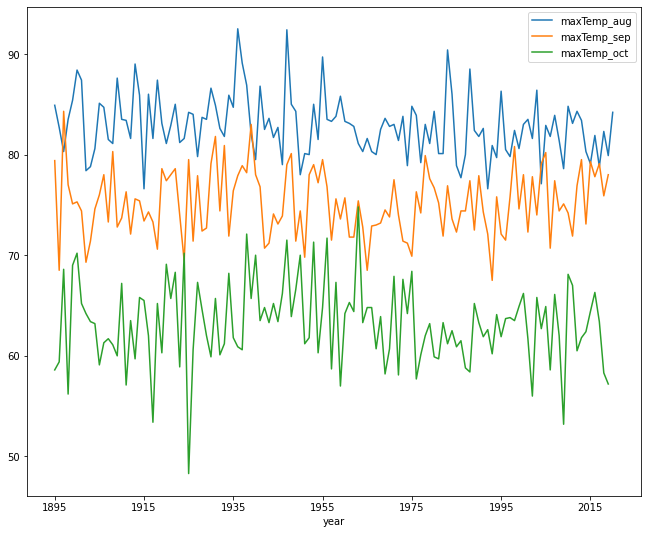

In [27]:
Iowa_maxTemp.to_csv("Iowa_maxTemp.csv", index = False)
Iowa_maxTemp.set_index('year', inplace=True)
Iowa_maxTemp.drop("state", axis=1, inplace=True)
Iowa_maxTemp[["maxTemp_aug", "maxTemp_sep", "maxTemp_oct"]] = Iowa_maxTemp[["maxTemp_aug", "maxTemp_sep", "maxTemp_oct"]].astype(float)
Iowa_maxTemp.plot(figsize=(11, 9))

In [28]:
# Import all states
allStates = states["State"]
      
mnt1 = ["may", "jun", "jul","aug", "sep", "oct"]    
states1 = allStates
allStates_maxTemp = []

for j in states1:
    perState = []
    for i in mnt1:
        dt1 = weatherData(states, maxTemp, j, i, "maxTemp")                                           
        perState.append(dt1)
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['year'], how='inner', suffixes=(None, "_u")), perState)
    allStates_maxTemp.append(df_merged)
    
allStates_maxTemp1 = pd.concat(allStates_maxTemp)
allStates_maxTemp1
allStates_maxTemp1.drop(["state_u"], axis = 1, inplace=True) 

allStates_maxTemp1.replace('-99.90', np.nan,  inplace=True)
allStates_maxTemp1.to_csv("allStates_maxTemp1.csv", index = False)
allStates_maxTemp1.head(10)

year    state maxTemp_may maxTemp_jun maxTemp_jul maxTemp_aug maxTemp_sep  \
0  1895  Alabama       80.60       88.40       89.60       89.70       89.10   
1  1896  Alabama       87.80       87.90       91.60       94.00       89.20   
2  1897  Alabama       82.20       94.00       92.80       89.50       88.70   
3  1898  Alabama       88.00       92.70       90.50       88.40       85.40   
4  1899  Alabama       88.60       92.30       91.90       92.00       86.30   
5  1900  Alabama       84.40       85.20       90.60       93.50       89.10   
6  1901  Alabama       84.00       91.10       95.10       89.60       83.70   
7  1902  Alabama       88.30       94.60       96.10       94.60       84.80   
8  1903  Alabama       81.00       85.10       92.00       91.80       86.70   
9  1904  Alabama       84.20       91.30       90.60       89.60       90.30   

  maxTemp_oct  
0       74.20  
1       75.80  
2       81.00  
3       72.30  
4       78.10  
5       78.20  
6       76.20  
7       75.60  
8       77.00  
9       80.10

In [29]:
# Import all states
allStates = states["State"]
      
mnt1 = ["may", "jun", "jul", "aug", "sep", "oct"]    
states1 = allStates
allStates_minTemp = []

for j in states1:
    perState = []
    for i in mnt1:
        dt1 = weatherData(states, minTemp, j, i, "minTemp")                                           
        perState.append(dt1)
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['year'], how='inner', suffixes=(None, "_u")), perState)
    allStates_minTemp.append(df_merged)
    
    
allStates_minTemp1 = pd.concat(allStates_minTemp)
allStates_minTemp1.drop(["state_u"], axis = 1, inplace=True)   
allStates_minTemp1.replace('-99.90', np.nan,  inplace=True)
allStates_minTemp1.to_csv("allStates_minTemp1.csv", index = False)
allStates_minTemp1.head(10)

year    state minTemp_may minTemp_jun minTemp_jul minTemp_aug minTemp_sep  \
0  1895  Alabama       58.40       66.50       68.80       69.30       66.40   
1  1896  Alabama       63.90       66.90       70.70       70.40       62.60   
2  1897  Alabama       55.90       68.30       70.20       68.10       62.50   
3  1898  Alabama       60.20       68.00       69.60       69.20       65.10   
4  1899  Alabama       63.60       67.60       68.90       69.90       59.40   
5  1900  Alabama       58.40       67.40       69.10       68.90       66.00   
6  1901  Alabama       57.10       66.50       69.80       67.80       61.00   
7  1902  Alabama       63.10       67.80       70.10       70.00       62.50   
8  1903  Alabama       58.70       62.20       68.80       69.40       59.80   
9  1904  Alabama       56.20       64.90       66.60       67.60       63.70   

  minTemp_oct  
0       45.20  
1       50.60  
2       53.10  
3       49.60  
4       54.00  
5       58.20  
6       48.80  
7       50.60  
8       49.40  
9       49.20

/home/jeff001/python36/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jeff001/python36/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


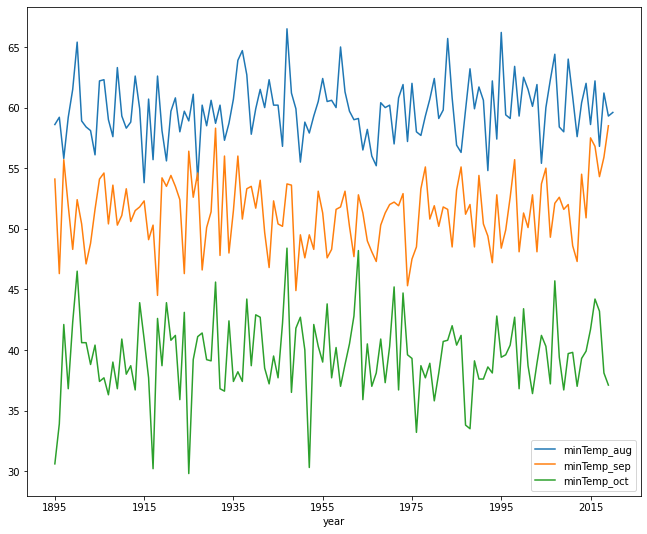

In [30]:
Iowa_minTemp = allStates_minTemp1[allStates_minTemp1["state"]== "Iowa"]
Iowa_minTemp.set_index('year', inplace=True)

Iowa_minTemp.drop("state", axis=1, inplace=True)
Iowa_minTemp
Iowa_minTemp[["minTemp_aug", "minTemp_sep", "minTemp_oct"]] = Iowa_minTemp[["minTemp_aug", "minTemp_sep", "minTemp_oct"]].astype(float)
Iowa_minTemp.plot(figsize=(11, 9))

In [31]:
# Import all states
allStates = states["State"]
      
mnt1 = ["may", "jun", "jun", "jul","aug", "sep", "oct"]    
states1 = allStates
allStates_precip = []

for j in states1:
    perState = []
    for i in mnt1:
        dt1 = weatherData(states, precip, j, i, "precip")                                           
        perState.append(dt1)
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['year'], how='inner', suffixes=(None, "_u")), perState)
    allStates_precip.append(df_merged)
    
allStates_precip = pd.concat(allStates_precip)
allStates_precip.drop(["state_u"], axis = 1, inplace=True)   
allStates_precip.replace('-99.90', np.nan,  inplace=True)
allStates_precip.to_csv("allStates_precip.csv", index = False)
allStates_precip.head(10)

year    state precip_may precip_jun precip_jun_u precip_jul precip_aug  \
0  1895  Alabama       3.78       5.79         5.79       4.51       5.13   
1  1896  Alabama       3.24       5.44         5.44       4.99       2.82   
2  1897  Alabama       1.60       1.97         1.97       4.72       6.07   
3  1898  Alabama       0.95       3.86         3.86       6.05       7.20   
4  1899  Alabama       2.03       2.91         2.91       6.73       3.86   
5  1900  Alabama       2.56      10.38        10.38       4.74       3.12   
6  1901  Alabama       5.30       3.25         3.25       3.49       9.12   
7  1902  Alabama       2.52       1.35         1.35       2.87       3.77   
8  1903  Alabama       6.25       4.75         4.75       4.39       4.57   
9  1904  Alabama       3.05       3.22         3.22       5.01       5.81   

  precip_sep precip_oct  
0       1.60       2.22  
1       1.80       2.27  
2       0.75       1.26  
3       3.46       3.84  
4       0.53       2.64  
5       4.06       5.79  
6       4.49       1.22  
7       4.22       3.63  
8       1.58       1.95  
9       1.23       0.26

/home/jeff001/python36/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jeff001/python36/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/home/jeff001/python36/lib/python3.6/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

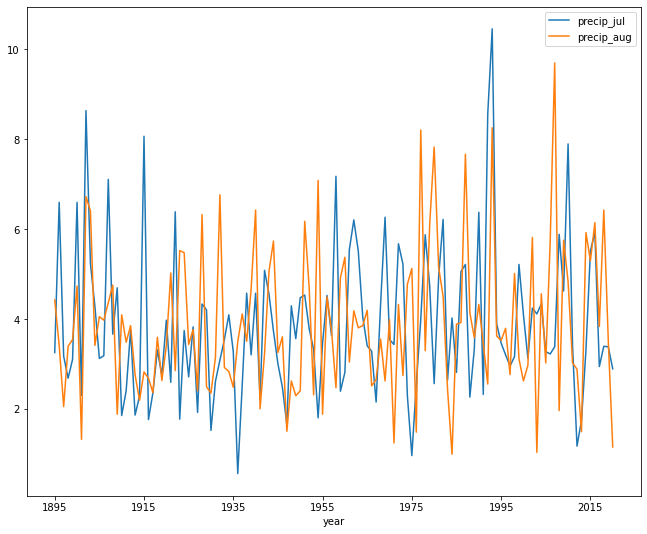

In [32]:
Iowa_precip = allStates_precip[allStates_precip["state"]== "Iowa"]
Iowa_precip.set_index('year', inplace=True)
Iowa_precip.drop("state", axis=1, inplace=True)
#Iowa_precip[["precip_jul", "precip_aug", "precip_sep", "precip_oct"]] = Iowa_precip[["precip_jul", "precip_aug", "precip_sep", "precip_oct"]].astype(float)
Iowa_precip[["precip_jul", "precip_aug"]] = Iowa_precip[["precip_jul", "precip_aug"]].astype(float)
Iowa_precip.replace(-9.99, np.nan, inplace=True)
Iowa_precip.plot(figsize=(11, 9))

In [33]:
Iowa_precip

precip_may precip_jun precip_jun_u  precip_jul  precip_aug precip_sep  \
year                                                                         
1895       3.20       4.18         4.18        3.25        4.42       3.12   
1896       6.47       3.27         3.27        6.59        3.41       3.97   
1897       1.89       3.90         3.90        3.17        2.05       1.97   
1898       4.47       4.40         4.40        2.68        3.39       2.62   
1899       6.04       5.17         5.17        3.10        3.54       0.96   
...         ...        ...          ...         ...         ...        ...   
2016       4.36       3.70         3.70        5.92        6.14       6.12   
2017       4.80       3.50         3.50        2.94        3.83       2.31   
2018       4.70       7.55         7.55        3.39        6.42       8.10   
2019       8.21       3.91         3.91        3.38        3.53       6.21   
2020       4.55       4.93         4.93        2.89        1.15      -9.99   

     precip_oct  
year             
1895       0.48  
1896       3.21  
1897       1.02  
1898       3.58  
1899       1.83  
...         ...  
2016       2.01  
2017       5.26  
2018       4.63  
2019       4.78  
2020      -9.99  

[126 rows x 7 columns]

In [34]:
allStates_precip['state'] = allStates_precip['state'].str.upper() 
model_allStates_precip = allStates_precip[allStates_precip['state'].isin(statesofInterest)]
model_allStates_precip = model_allStates_precip[["year", "state", "precip_may","precip_jun","precip_jul", "precip_aug", "precip_sep", "precip_oct"]]
model_allStates_precip.columns = model_allStates_precip.columns.str.title()
model_allStates_precip.to_csv("data_model_ready/model_allStates_precip.csv", index=False)

allStates_minTemp1['state'] = allStates_minTemp1['state'].str.upper() 
model_allStates_minTemp1 = allStates_minTemp1[allStates_minTemp1['state'].isin(statesofInterest)]
model_allStates_minTemp1 = model_allStates_minTemp1[["year", "state", "minTemp_may","minTemp_jun","minTemp_jul", "minTemp_aug", "minTemp_sep", "minTemp_oct"]]
model_allStates_minTemp1.columns = model_allStates_minTemp1.columns.str.title()
model_allStates_minTemp1.to_csv("data_model_ready/model_allStates_minTemp1.csv", index=False)

allStates_maxTemp1['state'] = allStates_maxTemp1['state'].str.upper() 
model_allStates_maxTemp1 = allStates_maxTemp1[allStates_maxTemp1['state'].isin(statesofInterest)]
model_allStates_maxTemp1 = model_allStates_maxTemp1[["year", "state", "maxTemp_may","maxTemp_jun","maxTemp_jul", "maxTemp_aug", "maxTemp_sep", "maxTemp_oct"]]
model_allStates_maxTemp1.columns = model_allStates_maxTemp1.columns.str.title()
model_allStates_maxTemp1.to_csv("data_model_ready/model_allStates_maxTemp1.csv", index=False)
